# Question 1
- Use ’glob’ to open and read file. If read multiple files use LOOP to achieve.
- Create at least one function and one lambda function.
- Save your data as an CSV file contains (Word, Rank, Frequency) with TITLE and Sort it by RANK. 
- Open your CSV file,   generate a log-log figure according to the data you saved.
- Write a conclusion at the end of your code base on your figure.
- (Optional) Use ‘matplotlib’ to generate a log-log figure in your code.

In [5]:
import nltk
from nltk.corpus import inaugural
inaugural.fileids()[0:5]

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt']

In [6]:
def read_words(filename):
    open_file=open(filename,encoding = "ISO-8859-1")
    words_list =[]
    contents = open_file.readlines()
    for i in range(len(contents)):
         words_list.extend(contents[i].split())
    return words_list    
    open_file.close()  

In [7]:
##get all words from inaugural files, and turn them into lowercase, also remove the punctuation and space from list.
import glob
import string
wordlist=[]
##"/Users/yutian/nltk_data/corpora/inaugural/*.txt"
for file in glob.glob("inaugural/*.txt"):
    list_word=read_words(file) 
    wordlist.extend(list_word)

wordlist=list(map(lambda x: x.lower(),wordlist))
wordlist = [''.join(c for c in s if c not in string.punctuation) for s in wordlist]
wordlist = [s for s in wordlist if s]

In [8]:
##count words frequency in list
import operator
from collections import Counter
counts=Counter(wordlist)

In [9]:
##original csv file
import csv

with open('mycsvfile.csv', 'w') as f: 
    w = csv.writer(f)
##    w.writerow(['rank', 'word', 'frenquency'])
    w.writerows(counts.items())

In [13]:
##sorted csv file
import sys, csv , operator,math  
data = csv.reader(open('mycsvfile.csv'),delimiter=',')



sortedlist = sorted(data,reverse=True, key = lambda x:  int(x[1]))  


with open('sorted_mycsvfile.csv', "w") as f:  
    ##fileWriter = csv.writer(f, delimiter=',') 
    filewriter = csv.DictWriter(f, fieldnames = ["rank","word","frequency"])
    filewriter.writeheader()
    rank=1
    for item in sortedlist: 
        filewriter.writerow({'rank':str(rank),'word':item[0],'frequency':str(item[1])})
        rank+=1
##f.close()  

In [14]:
##draw plot
from matplotlib import pyplot as plt
from csv import reader
import math


In [20]:
##DRAW PLOT
rank=[]
freq=[]
data = []
with open('sorted_mycsvfile.csv', 'r') as f:
    data = list(reader(f))
    ##temp = [i[3] for i in data[1::]]
    ##time = [parser.parse(i[19]) for i in data[1::]]
    rank=[i[0] for i in data[1::]]
    freq=[i[2] for i in data[1::]]
##    pyplot.plot(time, temp)
##    pyplot.show()
    
# print(data)
print(rank)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '

In [16]:
##coclusion:
##i pick up two inaugural files to test, according to zipf's, r * freq = A * N, so after use log to both side
##log(rank*frequency)=log(a*n), the plot should like y=k+logn, according to my plot , it proved , also i draw a conclusion
##that the constant in zipf's should less than 1.

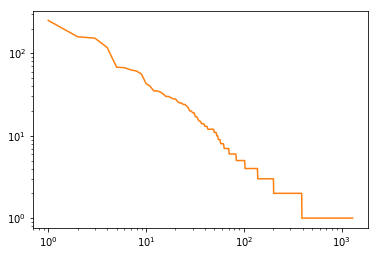

In [21]:
plt.loglog(rank,freq)
plt.show()